In [187]:
corrections_dict

{'keptlaughing': 'keptlaughing',
 'somebad': 'somebady',
 'presentid': 'presented',
 'eithy': 'eith',
 'sorryndings': 'surrondings',
 'ourtose': 'purpose',
 'colifornia': 'california',
 'resifes': 'resipes',
 'ceetain': 'certain',
 'edicational': 'educational',
 'documentories': 'documentaries',
 'continuence': 'continuance',
 'torirs': 'toris',
 'microcam': 'microcar',
 "doens't": "doesn't",
 'steair': 'stair',
 'discuraged': 'discouraged',
 'characterice': 'characterics',
 'unasul': 'unusual',
 'stratend': 'strated',
 'bookmail': 'bookmar',
 'coluler': 'coller',
 'everdone': 'everyone',
 'magagives': 'magazines',
 'detoer': 'deter',
 'num1,19': 'num1,19',
 'eoungh': 'eough',
 'blimbs': 'blimps',
 'loards': 'loads',
 'takeme': 'takem',
 'goies': 'goes',
 'gonning': 'goning',
 'vecation': 'vacation',
 'areputibal': 'preputial',
 'baite': 'bait',
 'presisely': 'precisely',
 'envirorment': 'environment',
 'packeg': 'packed',
 'modered': 'odered',
 "wer't": 'wernt',
 'resortes': 'resorted

In [196]:
X['essay'][12445]

" Everyone laughs differently , some people laugh so hard that they cry, and some don't. But one thing that they have in common is laughter. People use laughter as a way to express their feelings of joy, or happiness, or even if something is just really funny to them. Laughing is a great way to feel happier about something for instance maybe you are having a bad day and then one of your friends comes up to you and tells you a funny joke. It makes you feel better, right? Having a good sense of humor is something that can help you get through tough situations, embarrassing things, or even like I said just a bad day. Being able to laugh at yourself and even something that you might have done that was embarrassing is a good thing, it can help you get over it and not be so embarrassed about it. Whenever I laugh I always feel better, laughing reminds me of all the good things in life. Laughing reminds me of good times I have spent with friends and family, it reminds me of all the inside joke

In [1]:
import os

In [2]:
class HyperParameters:
    """Hyper-parameters of this project.

    This is a class holding necessary hyperparameters of this project. Instan-
    tiation of the class can get all of the parameters. Note that property
    protection is not constructed, so DO NOT change the values unless you know
    what you are doing.
    """
    def __init__(self):
        self.train_epochs = 700  # General training epochs.
#         self.w_dim = 50  # Word embedding dimension.
        self.w_dim = 300  # Word embedding dimension.
        self.s_len = 20  # Sentence length in the sentence-level models.
        self.e_len = 60  # Essay length in the sentence-level models.
        self.w_window_len = 5  # Convolution window size of word level.
        self.s_window_len = 3  # Convolution window size of sentence level.
        self.w_convunits_size = 64  # Convolution unit number of word level.
        self.s_convunits_size = 32 # Convolution unit number of sentence level.
        self.hidden_size = 100  # Dense layer size of sentence-level models.
        self.batch_size = 20  # Batch size.
        self.learning_rate = 0.006  # Initial learning rate.
        self.dropout_keep_prob = 0.3  # Dropout rate.
        self.d_e_len = 500  # Essay length in the document-level models.
        self.lstm_hidden_size = 150  # Dense layer size of LSTM models.
        self.cnn_lstm_convunits_size = 80  # Conv units of CNN-LSTM models.
        self.cnn_lstm_att_pool_size = 50  # Attention pool size.

class ProjectPaths:
    """Project paths of the application."""
    def __init__(self):
        self.aes_root = "essaysense"  # Temporarily
        self.tfmetadata = os.path.join(self.aes_root, "tfmetadata")
        self.datasets_root = os.path.join(self.aes_root, "datasets")
        self.asap = os.path.join(self.datasets_root, "training_set_rel3.tsv")
        self.asap_train = os.path.join(self.datasets_root, "train.tsv")
        self.asap_dev = os.path.join(self.datasets_root, "dev.tsv")
        self.asap_test = os.path.join(self.datasets_root, "test.tsv")
        self.asap_url = "http://p2u3jfd2o.bkt.clouddn.com/datasets/training_set_rel3.tsv"
#         self.glove = os.path.join(self.datasets_root, "glove.6B.50d.txt")
        self.glove = os.path.join(self.datasets_root, "glove.840B.300d.txt")
        self.glove_url = "http://p2u3jfd2o.bkt.clouddn.com/datasets/glove.6B.50d.txt"

    def model(self, model_name):
        return os.path.join(self.tfmetadata, model_name, "model.ckpt")

    def model_ckpt(self, model_name):
        return os.path.join(self.tfmetadata, model_name)

    def summary(self, model_name):
        return os.path.join(self.tfmetadata, model_name, "summary")


# Variables to export.
hp = hyperparameters = HyperParameters()
paths = ProjectPaths()


In [3]:
import codecs
import numpy as np

In [4]:
from tqdm import tqdm

In [5]:
with codecs.open(paths.glove, 'r', 'UTF-8') as glove_file:
    glove_vectors = {}
    for item in tqdm(glove_file.readlines()):
        item_lst = item.strip().split(' ')
        word = item_lst[0]
        vec = [float(i) for i in item_lst[1:hp.w_dim+2]]
        glove_vectors[word] = np.array(vec)
        

100%|██████████| 2196018/2196018 [04:17<00:00, 8513.69it/s] 


In [6]:
len(glove_vectors)

2196008

In [7]:
import nltk

In [8]:
def document_level_tokenize(essay_text):
    essay_text = essay_text.encode('ascii', errors='ignore').decode('utf-8', errors='ignore')
    essay_text = essay_text.lower()  # Use lower-cases for word embeddings.
    essay_text = essay_text.replace('/', ' / ')
    essay_text = essay_text.replace('@', ' ')
    essay_text = essay_text.replace('.', ' . ')
    essay_text = essay_text.replace('-', ' - ')
    essay = nltk.word_tokenize(essay_text)
    essay = list(map(lambda x : (x[:-1] if x[-1].isdigit() else x), essay))
    essay = list(filter(lambda x: len(x) > 0, essay))
    return essay

In [9]:
import pandas as pd

X = pd.read_csv('essaysense/datasets/training_set_rel3.tsv', sep='\t', encoding='ISO-8859-1')
y = X['domain1_score']

In [21]:
score_range = {1: (2, 12),
               2: (1, 6),
               3: (0, 3),
               4: (0, 3),
               5: (0, 4),
               6: (0, 4),
               7: (0, 30),
               8: (0, 60)}

In [22]:
def normalize_score(score, essay_set):
    return (float(score) - score_range[essay_set][0]) / float(score_range[essay_set][1] - score_range[essay_set][0])

In [164]:
def data_generator(data, labels, corrections=False):
    cnt_corrections = 0
    set_size = len(data)
    i_item = 0
    while True:
        if i_item >= set_size:
            i_item = 0
            
        item = data.iloc[i_item]
        label = labels.iloc[i_item]
        
        essay_text = document_level_tokenize(item['essay'])
        embedded = np.zeros([hp.d_e_len, hp.w_dim])
        for i in range(min(len(essay_text), hp.d_e_len)):
            if corrections and essay_text[i] in corrections_dict.keys():
                essay_text[i] = corrections_dict[essay_text[i]]
            
            embedded[i] = glove_vectors.get(essay_text[i], np.zeros(hp.w_dim))
            
        i_item += 1
        
        yield (embedded, normalize_score(label, item["essay_set"]))

In [11]:
def next_batch(gen, size_demand):
    essays_batched = []
    scores_batched = []
    for _ in range(size_demand):
        next_item = next(gen)  # Generate next item
        essays_batched.append(next_item[0])
        scores_batched.append(next_item[1])
    essays_batched = np.array(essays_batched)
    scores_batched = np.array(scores_batched)
    return essays_batched, scores_batched

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, stratify=X['essay_set'])


In [ ]:
train_gen = data_generator(X_train, y_train)
test_gen = data_generator(X_test, y_test)

In [ ]:
(all_test_essays,
 all_test_scores) = next_batch(test_gen, len(X_test.index))

In [14]:
"""An LSTM model for AES task.

    This model treat a piece of essay as a single sequence of words. LSTM cells
    accept the sequence and output a processed sequence. Then mean over time
    (MoT) pooling is performed which converts the feed tensor into an essay
    representation vector. Then a dense layer converts the vector to an
    appropriate score of the essay.

    Network Topology:
        [essay] -> lstm -> mot pooling -> dense -> [prediction score]

    Reference:
        This model basically implemented based on the article "A neural
        Approach to Automated Essay Scoring"
        (Taghipour and Ng, 2016).
    """

def define_graph():
    tf.reset_default_graph()
    essays = tf.placeholder(tf.float32, [None, hp.d_e_len,
                                         hp.w_dim])
    scores = tf.placeholder(tf.float32, [None])
    keep_prob = tf.placeholder_with_default(tf.constant(1.0, dtype=tf.float32), ())

    # Long Short-Term Memory layer
    lstm_cell = tfrnn.BasicLSTMCell(num_units=hp.lstm_hidden_size)
    lstm_cell = tfrnn.DropoutWrapper(
        cell=lstm_cell,
        output_keep_prob=keep_prob)
    init_state = lstm_cell.zero_state(hp.batch_size, dtype=tf.float32)
    lstm, _ = tf.nn.dynamic_rnn(lstm_cell, essays, dtype=tf.float32)

    # Mean over Time pooling
    mot = tf.reduce_mean(lstm, axis=1)

    # Dense layer
    dense = tf.layers.dense(inputs=mot, units=1, activation=tf.nn.sigmoid)

    # Prediction and Loss
    preds = tf.reshape(dense, [-1])
    loss = tf.losses.mean_squared_error(scores, preds)

    return (essays,
            scores,
            keep_prob,
            loss,
            preds)

In [24]:
os.environ[ "CUDA_VISIBLE_DEVICES" ] = "4"

In [25]:
import tensorflow as tf
from tensorflow.contrib import rnn as tfrnn

In [15]:
from sklearn.model_selection import StratifiedKFold

In [30]:
from sklearn.metrics import cohen_kappa_score

In [80]:
corrections_dict = np.load('corrections_dict.npy').reshape((1,))[0]

In [82]:
all_qwk_histories = []

skf = StratifiedKFold(n_splits=5, random_state=42)
for cv, (train_index, test_index) in enumerate(skf.split(np.zeros((len(X))), np.array(X['essay_set']))):
    train_index = np.random.permutation(train_index)
    test_index = np.random.permutation(test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    train_gen = data_generator(X_train, y_train, corrections=True)
    test_gen = data_generator(X_test, y_test, corrections=True)
    
    (all_test_essays,
     all_test_scores) = next_batch(test_gen, len(X_test.index))
    
    qwk_history = []
    
    (essays,
     scores,
     keep_prob,
     loss,
     preds) = define_graph()

    g_step = tf.Variable(0, dtype=tf.int32, trainable=False)
    learning_rate = tf.train.exponential_decay(hp.learning_rate,
                                               global_step=g_step,
                                               decay_steps=10,
                                               decay_rate=0.93)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):
        train_op = optimizer.minimize(loss=loss, global_step=g_step)

    saver = tf.train.Saver()
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    for counter in range(700+1):#hp.train_epochs):
        (train_essays,
         train_scores) = next_batch(train_gen, hp.batch_size)
        t_loss,_ = sess.run([loss, train_op],
                 feed_dict={essays: train_essays, scores: train_scores, keep_prob: hp.dropout_keep_prob})

        if counter % 50 == 0:
            print("Train: {:3d}, train-Loss: {:.6f}"
                  .format(counter, t_loss))
            (loss_got, preds_got) = sess.run([loss, preds], 
                                                            feed_dict={essays: all_test_essays, scores: all_test_scores, keep_prob: 1.0})


            results = []
            for i in range(1, 9):
                rescaled_preds = (preds_got[X_test['essay_set'] == i] * float(score_range[i][1] - score_range[i][0])) + score_range[i][0]
                rescaled_preds = np.array(np.around(rescaled_preds), dtype=int)
                results.append(cohen_kappa_score(rescaled_preds, y_test[X_test['essay_set'] == i], weights='quadratic'))

            print("QWK: ", results)

            qwk_history.append(results)
            
    all_qwk_histories.append(qwk_history)
    saver.save(sess, 'models/LSTM_cv_corr_{}'.format(cv))


Train:   0, train-Loss: 0.038675
QWK:  [0.18238299047356077, 0.06102029312288637, 0.12093105820223216, 0.08025404157043892, 0.26317430253692453, 0.16701122737826402, 0.1731183631652543, 0.024604857954137693]
Train:  50, train-Loss: 0.021235
QWK:  [0.7821371738143579, 0.5102669404517455, 0.5009643777629849, 0.5602642349393265, 0.5427877045252276, 0.5339942237139959, 0.6239399236097625, 0.27709168895149916]
Train: 100, train-Loss: 0.016935
QWK:  [0.7449814126394052, 0.5067409144196953, 0.49243962988038825, 0.5359318817419096, 0.6153131093275291, 0.5168374816983894, 0.6169476942293246, 0.2788540253763112]
Train: 150, train-Loss: 0.032952
QWK:  [0.7879247257977919, 0.561652281134402, 0.5929539465428536, 0.5937996496516886, 0.7220257684177485, 0.6064228207485816, 0.45823542083452573, 0.5022105809995386]
Train: 200, train-Loss: 0.022090
QWK:  [0.8227153476169654, 0.5889025137952177, 0.5956276639626014, 0.6000860724084136, 0.7132292444889969, 0.6542640763911755, 0.516299406515832, 0.433241081

Train: 550, train-Loss: 0.018033
QWK:  [0.7807262569832403, 0.5786380807852507, 0.6607982302516362, 0.6109998330829578, 0.7395274664166587, 0.7237308146399055, 0.6389517126453244, 0.3763077029104531]
Train: 600, train-Loss: 0.019600
QWK:  [0.7588915557495091, 0.5414012738853504, 0.6619563054028813, 0.6117816864537491, 0.7539333501405268, 0.7091709289877484, 0.6831389385418623, 0.29278450917405974]
Train: 650, train-Loss: 0.015172
QWK:  [0.7779890959807279, 0.5498845857912285, 0.65280107346528, 0.6109998330829578, 0.7389900757558314, 0.7224485045967648, 0.654206725418012, 0.3562388400333558]
Train: 700, train-Loss: 0.045760
QWK:  [0.7796509657743138, 0.555419236108869, 0.6456261555668841, 0.6085045204456856, 0.7373223806146032, 0.7174825713515387, 0.6516454518833066, 0.3649932461791321]
Train:   0, train-Loss: 0.074471
QWK:  [0.11022827383939426, 0.06966391076757517, 0.20707090894555924, 0.11778026930719454, 0.3204881580308201, 0.18937644341801385, 0.20306417959447776, 0.038518846449916

In [197]:
0.41905603402239033 + 0.5124910559758313 + 0.3649932461791321 + 0.4001507591622384 + 0.4725565823085267

2.169247677648119

In [198]:
2.169247677648119/5

0.4338495355296238

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline

In [69]:
all_qwk_histories_2 = all_qwk_histories_1

In [70]:
all_qwk_histories_1 = np.array(all_qwk_histories)

In [83]:
np.mean(np.array(all_qwk_histories)[:,-1,:])

0.6461143358452475

In [203]:
a = np.load('models/all_qwk_histories_cv_corr.npy')

In [204]:
print("{} +- {}".format(np.mean(np.mean(a[:,-1,:], axis=1)), np.std(np.mean(a[:,-1,:], axis=1))))

0.6461143358452475 +- 0.013056518112714357


In [93]:
for i in range(8):
    print("{} +- {}".format(np.mean(np.array(all_qwk_histories)[:,-1,i]), np.std(np.array(all_qwk_histories)[:,-1,i])))

0.7701568444406626 +- 0.03826498809268033
0.5808404889223195 +- 0.03159050713894637
0.6456868224143073 +- 0.01496573565925117
0.6404238736487516 +- 0.019510862054230676
0.7587637360796924 +- 0.023318945249544216
0.7160353182605739 +- 0.0238465452174299
0.6231580674660486 +- 0.02945413294610321
0.4338495355296238 +- 0.05249451020260626


In [94]:
for i in range(8):
    print("{} +- {}".format(np.mean(all_qwk_histories_1[:,-1,i]), np.std(all_qwk_histories_1[:,-1,i])))

0.7693550198539244 +- 0.021661612936620347
0.5650625459544382 +- 0.02555343394325605
0.6544067661678147 +- 0.009113096087537962
0.6465268537496321 +- 0.01479195246979707
0.7571615350944387 +- 0.026152979340370638
0.7184376443066394 +- 0.028130079351709567
0.622548045108271 +- 0.031243046082209514
0.42468499596418835 +- 0.042582112727159324


In [139]:
np.mean(all_qwk_histories_1[:,-1,:])

0.6447729257749184

In [103]:
import seaborn as sb

In [104]:
fmri = sb.load_dataset("fmri")

In [107]:
values = []
for i in range(5):
    for j in range(15):
        values.append((j, all_qwk_histories_1[i,j,0]))

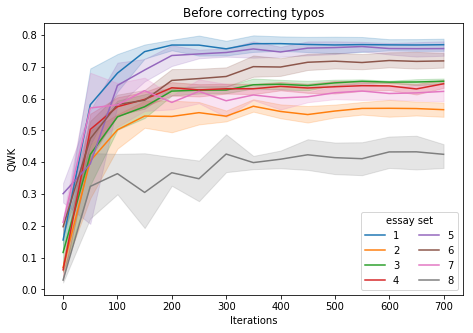

In [144]:
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(7.5,5))

for ess_set in range(8):
    
    values = []
    for i in range(5):
        for j in range(15):
            values.append((j*50, all_qwk_histories_1[i,j,ess_set]))
            
    data = pd.DataFrame(np.array(values))
    data.rename(columns={0:'Iterations',
                          1:'QWK',
                          },inplace=True)

    sbs.lineplot(x='Iterations', y='QWK', data=data, ax=ax, label=str(ess_set+1))
    
plt.title('Before correcting typos')
plt.legend(loc=4, title='essay set', ncol=2)
plt.savefig("qwk_cv_before.png")

In [134]:
np.mean(all_qwk_histories_1[:,-1,:])

0.6447729257749184

In [135]:
np.save('models/all_qwk_histories_cv.npy', all_qwk_histories_1)

In [138]:
np.array(all_qwk_histories)[:,-1,:].mean()

0.6461143358452475

In [136]:
np.save('models/all_qwk_histories_cv_corr.npy', np.array(all_qwk_histories))

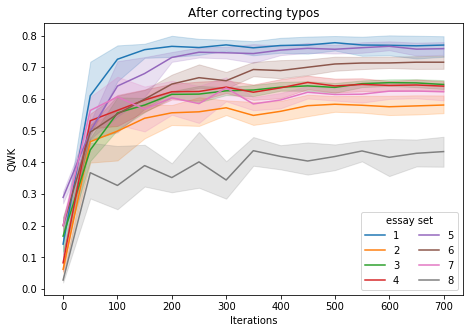

In [145]:
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(7.5,5))

for ess_set in range(8):
    
    values = []
    for i in range(5):
        for j in range(15):
            values.append((j*50, np.array(all_qwk_histories)[i,j,ess_set]))
            
    data = pd.DataFrame(np.array(values))
    data.rename(columns={0:'Iterations',
                          1:'QWK',
                          },inplace=True)

    sbs.lineplot(x='Iterations', y='QWK', data=data, ax=ax, label=str(ess_set+1))
    
plt.title('After correcting typos')
plt.legend(loc=4, title='essay set', ncol=2)
plt.savefig("qwk_cv_after.png")

In [93]:
for i in range(8):
    print("{} +- {}".format(np.mean(np.array(all_qwk_histories)[:,-1,i]), np.std(np.array(all_qwk_histories)[:,-1,i])))

0.7701568444406626 +- 0.03826498809268033
0.5808404889223195 +- 0.03159050713894637
0.6456868224143073 +- 0.01496573565925117
0.6404238736487516 +- 0.019510862054230676
0.7587637360796924 +- 0.023318945249544216
0.7160353182605739 +- 0.0238465452174299
0.6231580674660486 +- 0.02945413294610321
0.4338495355296238 +- 0.05249451020260626


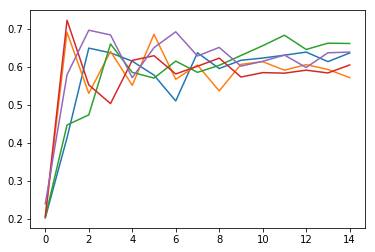

In [76]:
for i in range(5):
    plt.plot(all_qwk_histories_1[i,:,6])

In [146]:
from sklearn.model_selection import train_test_split

In [167]:
all_qwk_histories = []

X_train, X_test, y_train, y_test =  train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, stratify=X['essay_set'])

for ess_set in range(1, 9):

    train_gen = data_generator(X_train[X_train['essay_set'] == ess_set], y_train[X_train['essay_set'] == ess_set], corrections=True)
    test_gen = data_generator(X_test[X_test['essay_set'] == ess_set], y_test[X_test['essay_set'] == ess_set], corrections=True)
    
    (all_test_essays,
     all_test_scores) = next_batch(test_gen, len(X_test[X_test['essay_set'] == ess_set].index))
    
    qwk_history = []
    
    (essays,
     scores,
     keep_prob,
     loss,
     preds) = define_graph()

    g_step = tf.Variable(0, dtype=tf.int32, trainable=False)
    learning_rate = tf.train.exponential_decay(hp.learning_rate,
                                               global_step=g_step,
                                               decay_steps=10,
                                               decay_rate=0.93)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):
        train_op = optimizer.minimize(loss=loss, global_step=g_step)

    saver = tf.train.Saver()
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    for counter in range(700+1):#hp.train_epochs):
        (train_essays,
         train_scores) = next_batch(train_gen, hp.batch_size)
        t_loss,_ = sess.run([loss, train_op],
                 feed_dict={essays: train_essays, scores: train_scores, keep_prob: hp.dropout_keep_prob})

        if counter % 50 == 0:
            print("Train: {:3d}, train-Loss: {:.6f}"
                  .format(counter, t_loss))
            (loss_got, preds_got) = sess.run([loss, preds], 
                                                            feed_dict={essays: all_test_essays, scores: all_test_scores, keep_prob: 1.0})



            rescaled_preds = (preds_got * float(score_range[ess_set][1] - score_range[ess_set][0])) + score_range[ess_set][0]
            rescaled_preds = np.array(np.around(rescaled_preds), dtype=int)
            res = cohen_kappa_score(rescaled_preds, y_test[X_test['essay_set'] == ess_set], weights='quadratic')

            print("QWK: ", res)

            qwk_history.append(res)
            
    all_qwk_histories.append(qwk_history)
    saver.save(sess, 'models/LSTM_{}_corr'.format(ess_set))


Train:   0, train-Loss: 0.056264
QWK:  0.18136335209505938
Train:  50, train-Loss: 0.011808
QWK:  0.744049121036252
Train: 100, train-Loss: 0.008412
QWK:  0.7883825442728012
Train: 150, train-Loss: 0.004219
QWK:  0.8144384221619994
Train: 200, train-Loss: 0.007651
QWK:  0.7925371282008853
Train: 250, train-Loss: 0.002419
QWK:  0.8143750861237425
Train: 300, train-Loss: 0.005767
QWK:  0.8178883331080167
Train: 350, train-Loss: 0.004149
QWK:  0.8030071239382592
Train: 400, train-Loss: 0.008570
QWK:  0.8127759419453533
Train: 450, train-Loss: 0.003597
QWK:  0.8147365899861736
Train: 500, train-Loss: 0.009194
QWK:  0.8068486665614644
Train: 550, train-Loss: 0.009756
QWK:  0.8125552268623458
Train: 600, train-Loss: 0.005624
QWK:  0.8164343697350284
Train: 650, train-Loss: 0.006986
QWK:  0.8155322727822425
Train: 700, train-Loss: 0.007014
QWK:  0.814478942514602
Train:   0, train-Loss: 0.024675
QWK:  0.08530727958576423
Train:  50, train-Loss: 0.010001
QWK:  0.6070055531824008
Train: 100, tr

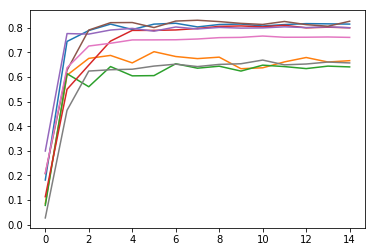

In [169]:
for i in range(8):
    plt.plot(np.array(all_qwk_histories)[i,:])

In [171]:
np.mean(np.array(all_qwk_histories)[:,-1])

0.745488975516408

In [172]:
np.save('models/all_qwk_histories_foreach_corr.npy', np.array(all_qwk_histories))

In [173]:
all_qwk_histories = []

X_train, X_test, y_train, y_test =  train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, stratify=X['essay_set'])

for ess_set in range(1, 9):

    train_gen = data_generator(X_train[X_train['essay_set'] == ess_set], y_train[X_train['essay_set'] == ess_set], corrections=False)
    test_gen = data_generator(X_test[X_test['essay_set'] == ess_set], y_test[X_test['essay_set'] == ess_set], corrections=False)
    
    (all_test_essays,
     all_test_scores) = next_batch(test_gen, len(X_test[X_test['essay_set'] == ess_set].index))
    
    qwk_history = []
    
    (essays,
     scores,
     keep_prob,
     loss,
     preds) = define_graph()

    g_step = tf.Variable(0, dtype=tf.int32, trainable=False)
    learning_rate = tf.train.exponential_decay(hp.learning_rate,
                                               global_step=g_step,
                                               decay_steps=10,
                                               decay_rate=0.93)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):
        train_op = optimizer.minimize(loss=loss, global_step=g_step)

    saver = tf.train.Saver()
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    for counter in range(700+1):#hp.train_epochs):
        (train_essays,
         train_scores) = next_batch(train_gen, hp.batch_size)
        t_loss,_ = sess.run([loss, train_op],
                 feed_dict={essays: train_essays, scores: train_scores, keep_prob: hp.dropout_keep_prob})

        if counter % 50 == 0:
            print("Train: {:3d}, train-Loss: {:.6f}"
                  .format(counter, t_loss))
            (loss_got, preds_got) = sess.run([loss, preds], 
                                                            feed_dict={essays: all_test_essays, scores: all_test_scores, keep_prob: 1.0})



            rescaled_preds = (preds_got * float(score_range[ess_set][1] - score_range[ess_set][0])) + score_range[ess_set][0]
            rescaled_preds = np.array(np.around(rescaled_preds), dtype=int)
            res = cohen_kappa_score(rescaled_preds, y_test[X_test['essay_set'] == ess_set], weights='quadratic')

            print("QWK: ", res)

            qwk_history.append(res)
            
    all_qwk_histories.append(qwk_history)
    saver.save(sess, 'models/LSTM_{}_wo_corr'.format(ess_set))


Train:   0, train-Loss: 0.069200
QWK:  0.15332933070303367
Train:  50, train-Loss: 0.011668
QWK:  0.7691904948892776
Train: 100, train-Loss: 0.008532
QWK:  0.798319946945693
Train: 150, train-Loss: 0.004174
QWK:  0.8187473854701863
Train: 200, train-Loss: 0.007716
QWK:  0.792311320754717
Train: 250, train-Loss: 0.002170
QWK:  0.8141907362961737
Train: 300, train-Loss: 0.005803
QWK:  0.8189991610057106
Train: 350, train-Loss: 0.003783
QWK:  0.801930758988016
Train: 550, train-Loss: 0.010063
QWK:  0.8121110801523173
Train: 600, train-Loss: 0.005460
QWK:  0.8151494360128441
Train: 650, train-Loss: 0.007242
QWK:  0.8154084798345398
Train: 700, train-Loss: 0.006869
QWK:  0.8151385530965223
Train:   0, train-Loss: 0.023259
QWK:  -0.06881475144948213
Train:  50, train-Loss: 0.008941
QWK:  0.5988904818300815
Train: 100, train-Loss: 0.014481
QWK:  0.7068602836398181
Train: 150, train-Loss: 0.010829
QWK:  0.6638527875622494
Train: 200, train-Loss: 0.009427
QWK:  0.6826108396467476
Train: 250, tr

In [176]:
np.mean(np.array(all_qwk_histories)[:,-1])

0.749824534738396

In [177]:
np.array(all_qwk_histories)[:,-1]

array([0.81513855, 0.68875643, 0.63525603, 0.80108193, 0.80145767,
       0.82752234, 0.76124786, 0.66813547])

In [205]:
np.mean([0.81513855, 0.68875643, 0.63525603, 0.80108193, 0.80145767,
       0.82752234, 0.76124786, 0.66813547])

0.7498245349999999

In [179]:
np.load('models/all_qwk_histories_foreach_corr.npy')[:,-1]

array([0.81447894, 0.66598579, 0.64067921, 0.79958759, 0.79980322,
       0.82606767, 0.76049709, 0.65681229])